**4.4 Playing with Data Traces**

For this assignment, I am going to look at data traces within my gmail data.

In [65]:
#Importing Libraries
import mailbox
import csv
import pandas as pd
import numpy as np
import datetime as dt
import config
import plotly.express as px
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
#for this codeblock, I used a youtube tutorial as a reference.
#google gave me the data as an mbox file, following a tutorial I was able to read it into a csv.
writer=csv.writer(open('mail.csv','w'))
for message in mailbox.mbox("/Users/jasminekellett/Desktop/All mail Including Spam and Trash-001.mbox"):
    writer.writerow([message['to'], message['from'], message['date']])

In [3]:
#converting the csv to pandas for manipulation purposes.
maildf=pd.read_csv('mail.csv')

In [4]:
#adding a header to the dataframe as the csv only consists of the raw data
header = ['recipient', 'sender', 'timestamp']
maildf.columns=header

In [5]:
#including this step to hide my personal email if I post this to github!
#Note: after continued issues with troubleshooting I did run this line of code through anacondas AI tool to discover I needed to include an na=False term to avoid na errors.

maildf.loc[maildf['recipient'].str.contains(config.UNAME, case=False, na=False), 'recipient'] = 'personal_email'
maildf.loc[maildf['sender'].str.contains(config.UNAME, case=False, na=False), 'sender'] = 'personal_email'

maildf.loc[maildf['recipient'].str.contains(config.SNAME, case=False, na=False), 'recipient'] = 'school_email'
maildf.loc[maildf['recipient'].str.contains(config.SVNAME, case=False, na=False), 'recipient'] = 'school_email'

In [39]:
#summary of dataframe so far.
maildf.info()
#due to the size of this dataframe, I will only be examining the first 10,000 rows. I may trim that down further later.
newdf = maildf[0:10000]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43745 entries, 0 to 43744
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recipient  43703 non-null  object
 1   sender     43745 non-null  object
 2   timestamp  43729 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [40]:
display(newdf)

,recipient,sender,timestamp
0,personal_email,"""My Degree Path"" <news@mydegreepath.com>",05 Feb 2026 02:32:36 -0000
1,personal_email,"""Urban Outfitters"" <urbanoutfitters@s.urbanout...","Thu, 05 Feb 2026 17:45:34 -0600"
2,personal_email,"""IHOP"" <info@email.ihop.com>","Thu, 05 Feb 2026 11:07:26 -0600"
3,personal_email,"""Urban Outfitters"" <urbanoutfitters@s.urbanout...","Fri, 30 Jan 2026 17:32:15 -0600"
4,personal_email,=?UTF-8?B?RGlzY292ZXI=?= <discover@card-e.em.d...,"Mon, 2 Feb 2026 19:02:02 +0000"
...,...,...,...
9995,personal_email,Good Dye Young <hey@gooddyeyoung.com>,"Sat, 27 Sep 2025 06:01:22 +0000 (UTC)"
9996,personal_email,Universal Yums <support@universalyums.com>,"Sat, 27 Sep 2025 03:15:06 +0000 (UTC)"
9997,personal_email,"""SHEIN"" <info@news.us.shein.com>","Tue, 23 Sep 2025 05:41:55 +0200"
9998,personal_email,My Degree Path <news@mydegreepath.com>,"Thu, 25 Sep 2025 04:20:40 +0000"


**Converting the Timestamp Column to Datetime**

In [41]:
#in order to explore the data later on we must first convert the timestamp data to datetime.
#note: format='mixed' was used as this dataset contains varied timestamp configurations. and utc='True' was included due a depreciation warning.
newdf['newtime']=pd.to_datetime(newdf['timestamp'], format='mixed', utc='True')

/var/folders/ks/cfqp33wd7g72hx80g1yp8ln40000gn/T/ipykernel_71560/842098103.py:3: FutureWarning:

Parsing 'MST' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead

/var/folders/ks/cfqp33wd7g72hx80g1yp8ln40000gn/T/ipykernel_71560/842098103.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
#datetime check!
display(newdf)
newdf.dtypes

,recipient,sender,timestamp,newtime
0,personal_email,"""My Degree Path"" <news@mydegreepath.com>",05 Feb 2026 02:32:36 -0000,2026-02-05 02:32:36+00:00
1,personal_email,"""Urban Outfitters"" <urbanoutfitters@s.urbanout...","Thu, 05 Feb 2026 17:45:34 -0600",2026-02-05 23:45:34+00:00
2,personal_email,"""IHOP"" <info@email.ihop.com>","Thu, 05 Feb 2026 11:07:26 -0600",2026-02-05 17:07:26+00:00
3,personal_email,"""Urban Outfitters"" <urbanoutfitters@s.urbanout...","Fri, 30 Jan 2026 17:32:15 -0600",2026-01-30 23:32:15+00:00
4,personal_email,=?UTF-8?B?RGlzY292ZXI=?= <discover@card-e.em.d...,"Mon, 2 Feb 2026 19:02:02 +0000",2026-02-02 19:02:02+00:00
...,...,...,...,...
9995,personal_email,Good Dye Young <hey@gooddyeyoung.com>,"Sat, 27 Sep 2025 06:01:22 +0000 (UTC)",2025-09-27 06:01:22+00:00
9996,personal_email,Universal Yums <support@universalyums.com>,"Sat, 27 Sep 2025 03:15:06 +0000 (UTC)",2025-09-27 03:15:06+00:00
9997,personal_email,"""SHEIN"" <info@news.us.shein.com>","Tue, 23 Sep 2025 05:41:55 +0200",2025-09-23 03:41:55+00:00
9998,personal_email,My Degree Path <news@mydegreepath.com>,"Thu, 25 Sep 2025 04:20:40 +0000",2025-09-25 04:20:40+00:00


recipient                 object
sender                    object
timestamp                 object
newtime      datetime64[ns, UTC]
dtype: object

In [43]:
#sorting the df in descending order for easier readbility
newdf=newdf.sort_values(by='newtime', ascending=False)
display(newdf)

,recipient,sender,timestamp,newtime
264,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:19:53 GMT",2026-02-06 07:19:53+00:00
265,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:11:00 GMT",2026-02-06 07:11:00+00:00
480,personal_email,Google <no-reply@google.com>,"Thu, 05 Feb 2026 23:07:38 -0800",2026-02-06 07:07:38+00:00
1485,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:06:34 GMT",2026-02-06 07:06:34+00:00
19,personal_email,"""Instagram"" <no-reply@mail.instagram.com>","Thu, 5 Feb 2026 23:00:10 -0800",2026-02-06 07:00:10+00:00
...,...,...,...,...
9973,personal_email,Rowan <info@heyrowan.com>,"Tue, 23 Sep 2025 13:02:18 +0000 (UTC)",2025-09-23 13:02:18+00:00
9924,personal_email,=?UTF-8?B?TGVuc0NyYWZ0ZXJz?= <news@e.lenscraft...,"Tue, 23 Sep 2025 11:01:21 +0000",2025-09-23 11:01:21+00:00
9985,personal_email,DICK'S Sporting Goods <DSG@e.dcsg.com>,"Tue, 23 Sep 2025 07:21:03 +0000",2025-09-23 07:21:03+00:00
9997,personal_email,"""SHEIN"" <info@news.us.shein.com>","Tue, 23 Sep 2025 05:41:55 +0200",2025-09-23 03:41:55+00:00


In [44]:
#due to the size of the df, I will focus on the last two weeks of data. I filtered the email dataset to the last two weeks: 1-19-2026 to 2-5-2026.
filterdf=newdf[newdf['newtime']>'2026-1-22'].reset_index()
display(filterdf)

,index,recipient,sender,timestamp,newtime
0,264,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:19:53 GMT",2026-02-06 07:19:53+00:00
1,265,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:11:00 GMT",2026-02-06 07:11:00+00:00
2,480,personal_email,Google <no-reply@google.com>,"Thu, 05 Feb 2026 23:07:38 -0800",2026-02-06 07:07:38+00:00
3,1485,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:06:34 GMT",2026-02-06 07:06:34+00:00
4,19,personal_email,"""Instagram"" <no-reply@mail.instagram.com>","Thu, 5 Feb 2026 23:00:10 -0800",2026-02-06 07:00:10+00:00
...,...,...,...,...,...
1074,915,personal_email,"""Ulta Beauty"" <U-Mail@e.ulta.com>","Wed, 21 Jan 2026 19:17:17 -0600",2026-01-22 01:17:17+00:00
1075,682,personal_email,"""Steve Madden"" <stevemadden@email.stevemadden....","Thu, 22 Jan 2026 01:14:48 +0000",2026-01-22 01:14:48+00:00
1076,1037,personal_email,=?utf-8?b?4py/c2hpdCB5b3Ugc2hvdWxkIGNhcmUgYWJv...,"Thu, 22 Jan 2026 00:39:51 +0000",2026-01-22 00:39:51+00:00
1077,1506,personal_email,"""HelloFresh"" <hello@g.hellofresh.com>","Wed, 21 Jan 2026 18:12:51 -0600",2026-01-22 00:12:51+00:00


In [13]:
sendercounts=filterdf['sender'].unique()
display(sendercounts)

array(['Google <no-reply@accounts.google.com>',
       'Google <no-reply@google.com>',
       '"Instagram" <no-reply@mail.instagram.com>',
       '"Instagram" <security@mail.instagram.com>',
       '"JENNIE" <JENNIE@emails.sonymusicfans.com>',
       'Reddit <noreply@redditmail.com>',
       'Good Dye Young <hey@gooddyeyoung.com>',
       '"NORDSTROM RACK" <nordstromrack@eml.nordstromrack.com>',
       '"My Degree Path" <news@mydegreepath.com>',
       'SHEIN <shein@news.emailmarket.shein.com>',
       '"Mark Kelly" <feedback@e.democrats.org>',
       '"Target" <targetnews@em.target.com>',
       'YUNGBLUD Official Store <Yungblud@us.umusic-online.com>',
       '"Ulta Beauty" <U-Mail@e.ulta.com>',
       'Tumblr <no-reply@tumblr.com>',
       '"Redbubble" <heythere@m.redbubble.com>',
       'AKIRA <hello@shopakira.com>', 'Disturbia <info@disturbia.us>',
       '"Urban Outfitters" <urbanoutfitters@s.urbanoutfitters.com>',
       '=?iso-8859-1?q?A=E9ropostale?= <aeropostale@offers.aeropo

*Categorizing the emails*

In [45]:
#ran into multiple errors defining a function and using np.where. Instead used .loc method with corresponding documentation worked best!
#since the majority of my emails are--by far--shopping related, I am assigning them all to that category then going in and filtering them out correct.
#I would have used np.where but there were too many categories present.
filterdf['email category'] = 'Shopping'

#filtering and recategorizing out key senders!
filterdf.loc[filterdf['sender'].str.contains('bands|spotify|sony|music|records|iheart|stageit|livenation'), 'email category'] = 'Music Updates'

filterdf.loc[filterdf['sender'].str.contains('google'), 'email category'] = 'Google Updates'

filterdf.loc[filterdf['sender'].str.contains('linkedin'), 'email category'] = 'Career'

filterdf.loc[filterdf['sender'].str.contains('fandango|netflix|hulu'), 'email category'] = 'Subscriptions'

filterdf.loc[filterdf['sender'].str.contains('insta|x|tiktok|reddit|substack|stanmail|tumblr'), 'email category'] = 'Social Media'

filterdf.loc[filterdf['sender'].str.contains('nytimes|washingtonpost|phoenixchildrens|shanti'), 'email category'] = 'News'

filterdf.loc[filterdf['sender'].str.contains('salliemae|asu|degreepath|studentaid|maricopa|airlearn'), 'email category'] = 'Education'

filterdf.loc[filterdf['sender'].str.contains('demo|dccc|kamala'), 'email category'] = 'Other'

filterdf.loc[filterdf['sender'].str.contains('sonic|chick-fil-a|panera|firehouse|caesars|ihop|doordash|uber|saladandgo|popeyes'), 'email category'] = 'Food'

filterdf.loc[filterdf['sender'].str.contains('nintendo|playstation|twitch|critrole|warframe'), 'email category'] = 'Gaming'

In [46]:
display(filterdf)

,index,recipient,sender,timestamp,newtime,email category
0,264,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:19:53 GMT",2026-02-06 07:19:53+00:00,Google Updates
1,265,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:11:00 GMT",2026-02-06 07:11:00+00:00,Google Updates
2,480,personal_email,Google <no-reply@google.com>,"Thu, 05 Feb 2026 23:07:38 -0800",2026-02-06 07:07:38+00:00,Google Updates
3,1485,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:06:34 GMT",2026-02-06 07:06:34+00:00,Google Updates
4,19,personal_email,"""Instagram"" <no-reply@mail.instagram.com>","Thu, 5 Feb 2026 23:00:10 -0800",2026-02-06 07:00:10+00:00,Social Media
...,...,...,...,...,...,...
1074,915,personal_email,"""Ulta Beauty"" <U-Mail@e.ulta.com>","Wed, 21 Jan 2026 19:17:17 -0600",2026-01-22 01:17:17+00:00,Shopping
1075,682,personal_email,"""Steve Madden"" <stevemadden@email.stevemadden....","Thu, 22 Jan 2026 01:14:48 +0000",2026-01-22 01:14:48+00:00,Shopping
1076,1037,personal_email,=?utf-8?b?4py/c2hpdCB5b3Ugc2hvdWxkIGNhcmUgYWJv...,"Thu, 22 Jan 2026 00:39:51 +0000",2026-01-22 00:39:51+00:00,Social Media
1077,1506,personal_email,"""HelloFresh"" <hello@g.hellofresh.com>","Wed, 21 Jan 2026 18:12:51 -0600",2026-01-22 00:12:51+00:00,Shopping


In [53]:
#filling the single na email, with my email that was lost along the way
filterdf['recipient'].value_counts()
filterdf.fillna({'recipient':'personal_email'}, inplace=True)

recipient
personal_email    1079
Name: count, dtype: int64

In [52]:
filterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   index           1079 non-null   int64              
 1   recipient       1079 non-null   object             
 2   sender          1079 non-null   object             
 3   timestamp       1079 non-null   object             
 4   newtime         1079 non-null   datetime64[ns, UTC]
 5   email category  1079 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 50.7+ KB


In [54]:
categorypercent = round(filterdf['email category'].value_counts(normalize=True)*100,2)
display(categorypercent)

email category
Shopping          66.08
Social Media       7.88
Food               6.86
News               4.82
Other              4.54
Music Updates      4.08
Education          2.69
Gaming             1.39
Subscriptions      0.83
Google Updates     0.56
Career             0.28
Name: proportion, dtype: float64

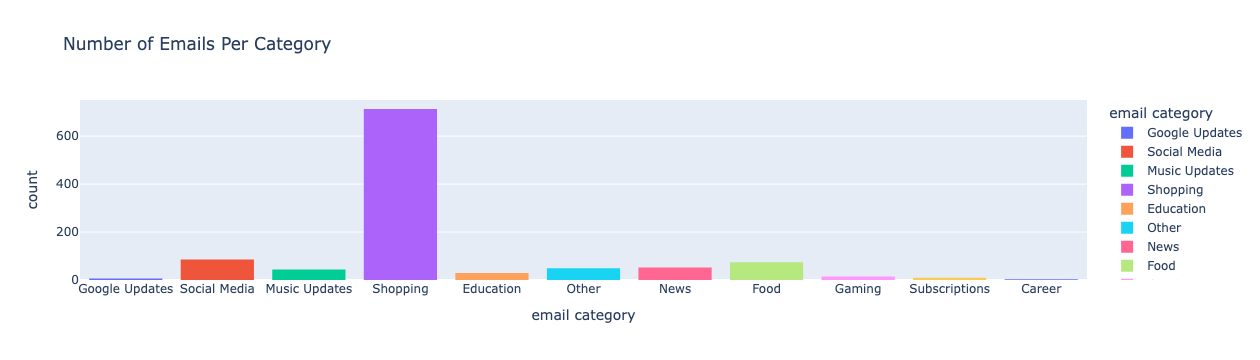

In [60]:
#plot of the number of emails seen across these categories from the last two weeks.
fig = px.histogram(filterdf, x='email category', color='email category', title='Number of Emails Per Category')
fig.show()

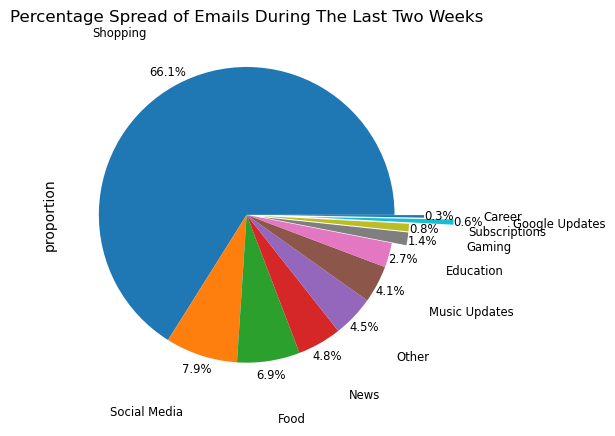

In [83]:
#plot of the number of emails seen across these categories from the last two weeks.
explode=(0,0,0,0,0,0,0, 0.1, 0.1, 0.4, 0.2)

categorypercent.plot(kind='pie', explode=explode, textprops={'size':'smaller'}, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.4, title='Percentage Spread of Emails During The Last Two Weeks')
plt.show()

In [152]:
#creating columns of the date for future manipulation
filterdf['month'] = filterdf['newtime'].dt.strftime('%m')
filterdf['monthday'] = filterdf['newtime'].dt.strftime('%m-%d')
filterdf['monthyear'] = filterdf['newtime'].dt.strftime('%Y-%m-%d')
#creating 'day' to get daily totals of each category to put into a line graph.
day=filterdf.groupby(['monthyear','email category']).size().reset_index(name='count')
display(filterdf)

,index,recipient,sender,timestamp,newtime,email category,month,monthday,monthyear
0,264,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:19:53 GMT",2026-02-06 07:19:53+00:00,Google Updates,02,02-06,2026-02-06
1,265,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:11:00 GMT",2026-02-06 07:11:00+00:00,Google Updates,02,02-06,2026-02-06
2,480,personal_email,Google <no-reply@google.com>,"Thu, 05 Feb 2026 23:07:38 -0800",2026-02-06 07:07:38+00:00,Google Updates,02,02-06,2026-02-06
3,1485,personal_email,Google <no-reply@accounts.google.com>,"Fri, 06 Feb 2026 07:06:34 GMT",2026-02-06 07:06:34+00:00,Google Updates,02,02-06,2026-02-06
4,19,personal_email,"""Instagram"" <no-reply@mail.instagram.com>","Thu, 5 Feb 2026 23:00:10 -0800",2026-02-06 07:00:10+00:00,Social Media,02,02-06,2026-02-06
...,...,...,...,...,...,...,...,...,...
1074,915,personal_email,"""Ulta Beauty"" <U-Mail@e.ulta.com>","Wed, 21 Jan 2026 19:17:17 -0600",2026-01-22 01:17:17+00:00,Shopping,01,01-22,2026-01-22
1075,682,personal_email,"""Steve Madden"" <stevemadden@email.stevemadden....","Thu, 22 Jan 2026 01:14:48 +0000",2026-01-22 01:14:48+00:00,Shopping,01,01-22,2026-01-22
1076,1037,personal_email,=?utf-8?b?4py/c2hpdCB5b3Ugc2hvdWxkIGNhcmUgYWJv...,"Thu, 22 Jan 2026 00:39:51 +0000",2026-01-22 00:39:51+00:00,Social Media,01,01-22,2026-01-22
1077,1506,personal_email,"""HelloFresh"" <hello@g.hellofresh.com>","Wed, 21 Jan 2026 18:12:51 -0600",2026-01-22 00:12:51+00:00,Shopping,01,01-22,2026-01-22


In [153]:
#sanity check. I had to include monthyear instead of monthday as I ran into error of the wrong day/year from being reported.
display(day)

,monthyear,email category,count
0,2026-01-22,Education,4
1,2026-01-22,Food,3
2,2026-01-22,Gaming,3
3,2026-01-22,Music Updates,4
4,2026-01-22,News,3
...,...,...,...
122,2026-02-06,Google Updates,4
123,2026-02-06,Music Updates,2
124,2026-02-06,Other,1
125,2026-02-06,Shopping,8


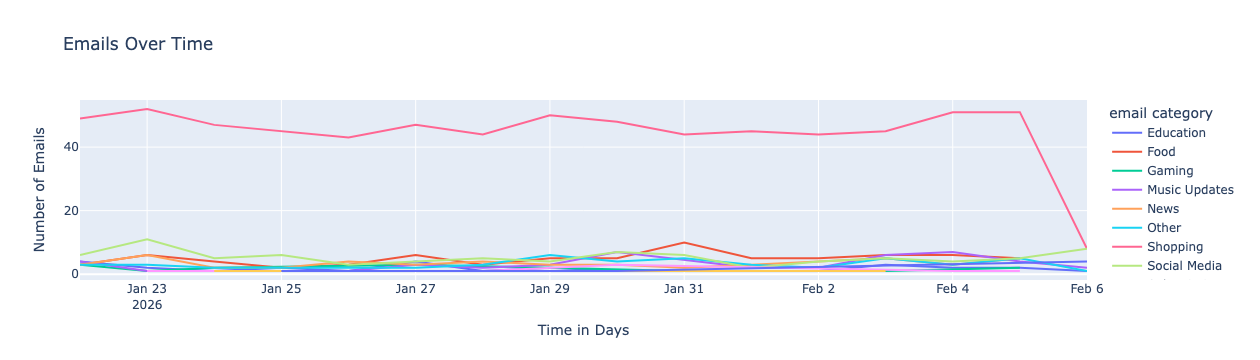

In [156]:
#plotting the occurence of emails over the last two weeks by category
fig=px.line(day, x='monthyear', y='count', color='email category', labels={'monthyear':'Time in Days','count':'Number of Emails'}, title='Emails Over Time')
fig.show()

In [124]:
mostfrequent=filterdf['sender'].mode()
mfreqcount=filterdf['sender'].value_counts()

print(f'The most frequent email sender was {mostfrequent} with {mfreqcount.head(2)}')

The most frequent email sender was 0    "SHEIN" <shein@market-us.shein.com>
Name: sender, dtype: object with sender
"SHEIN" <shein@market-us.shein.com>         36
"JCPenney" <JCPenney@email.jcpenney.com>    35
Name: count, dtype: int64


In [98]:
#frequency of these senders
print(filterdf.groupby(['email category'])['sender'].agg(pd.Series.mode))

email category
Career                      LinkedIn <updates-noreply@linkedin.com>
Education                  "My Degree Path" <news@mydegreepath.com>
Food                       "Sonic" <noreply@email.sonicdrivein.com>
Gaming                  "PlayStation" <email@email.playstation.com>
Google Updates                Google <no-reply@accounts.google.com>
Music Updates     Bandsintown <notifications@updates.bandsintown...
News                 The Washington Post <email@washingtonpost.com>
Other             "Flip the Senate" <information@democrats.senat...
Shopping                        "SHEIN" <shein@market-us.shein.com>
Social Media                    "BoxLunch" <noreply@s.boxlunch.com>
Subscriptions               Fandango <fandango@movies.fandango.com>
Name: sender, dtype: object
